# Data Cleaning

   First step of any data related project is to extract the data, Second is to clean it, which is called as Data Cleaning. 

   Here I have used the data which is available on LendingClub website but it is not a clean data therefore it needs to be cleaned before it is of any use.
   
   To start I'll load the dataset into a pandas DataFrame and name it **lending_club_loan_data**. The next step will be to clean this data, as it contains human errors, null values, irregular data formats, outliers, and lengthy texts.

Here are the specific cleaning steps I'll take:

- **Remove the first line**: 

   This line contains extraneous text instead of the column titles, which prevents the dataset from being parsed properly by the pandas library.


- **Drop unnecessary columns**:

   - The desc column, which contains a long text explanation for the loan that I won't need. 
   - The url column,which contains links to each loan on Lending Club, accessible only with an investor account.


- **Eliminate columns with excessive missing values**: 

    Removing all columns that have more than 50% missing values. This will help streamline the data processing while keeping the dataset meaningful, as it's large enough to remain useful even after these columns are removed.


Finally, I'll name the cleaned dataset **cleaned_loans_2007** and save it as csv file. This will keep the cleaned data separate from the raw data, ensuring that I have the original dataset available if I need to retrieve anything later. 

Then I'll start feature selection and feature engineering where I'll select which feature can help the model and create new features/column based on other columns to help the model classify defaulters.


**To get started with python we need to import some libraries.**

In [210]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Now, I'll go ahead and perform these steps:

- **Step 1 : Skipping row 1 so pandas can parse the data properly.**

In [211]:

loans_2007 = pd.read_csv('lending_club_loans.csv', skiprows=1, low_memory=False) 

- Dropping any column with more than 50% missing values

In [212]:
half_count = len(loans_2007) / 2 
loans_2007 = loans_2007.dropna(thresh=half_count,axis=1)

- Dropping 'url' and 'desc' columns as they are of no use

In [213]:
loans_2007 = loans_2007.drop(['url','desc'],axis=1)

I'll use the pandas "head()" method to display first three rows of the loans_2007 DataFrame, just to make sure we were able to load the dataset properly:

In [214]:
loans_2007.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


I'll also use pandas ".shape" attribute to view the number of samples and features I am dealing with at this stage:

In [215]:
loans_2007.shape

(42538, 56)

- **Step 2: Narrowing Down Our Columns for Cleaning**

    Now that I've got my data set up, I should spend some time exploring it and understanding what feature each column represents. This is important because having a poor understanding of the features could cause me to make mistakes in the data analysis and the modeling process.

    I'll be using the data dictionary LendingClub provides to help me become familiar with the columns and what each represents in the data set. To make the process easier, I'll create a DataFrame to contain the names of the columns, data type, first row's values, and description from the data dictionary. Let's load that dictionary and take a look.

Loading in the data dictionary

In [216]:
data_dictionary = pd.read_csv('LCDataDictionary.csv')  
print(data_dictionary.shape[0]) 

117


In [217]:
print(data_dictionary.columns.tolist())

['LoanStatNew', 'Description']


In [218]:
data_dictionary.head() 


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


Renaming columns for ease of reading

In [219]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})

In [220]:
data_dictionary.head()

,name,description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


Now that I've got the data dictionary loaded, I'll join the first row of loans_2007 to the data_dictionary DataFrame to give me a preview DataFrame with the following columns:

- name          — contains the column names of loans_2007. 
- dtypes        — contains the data types of the loans_2007 columns. 
- first value   — contains the values of loans_2007 first row. 
- description   — explains what each column in loans_2007 represents.

In [221]:
loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes,columns=['dtypes']) 
loans_2007_dtypes = loans_2007_dtypes.reset_index() 
loans_2007_dtypes['name'] = loans_2007_dtypes['index'] 
loans_2007_dtypes = loans_2007_dtypes[['name','dtypes']] 
loans_2007_dtypes['first value'] = loans_2007.loc[0].values 
preview = loans_2007_dtypes.merge(data_dictionary, on='name',how='left') 
preview.head()

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000.0,The listed amount of the loan applied for by t...
3,funded_amnt,float64,5000.0,The total amount committed to that loan at tha...
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for th...


When I printed the shape of loans_2007 earlier, I noticed that it had 56 columns, so I know that this preview DataFrame has 56 rows (one explaining each column in loans_2007).

It can be cumbersome to try to explore all the rows of a preview at once, so instead, I'll break it up into three parts and look at a smaller selection of features each time.

As I explore the features to better understand each of them, I'll want to pay attention to any column that: leaks information from the future (after the loan has already been funded), doesn't affect the borrower's ability to pay back the loan (e.g. a randomly generated ID value by Lending Club), is formatted poorly, requires more data or a lot of pre-processing to turn into a useful feature, or contains redundant information.

These are all things I'll want to be careful about since handling them incorrectly will hurt my analysis in the long run. I need to especially pay close attention to data leakage, which can cause the model to overfit. This is because the model would be learning from features that won't be available when I'm using it to make predictions about future loans.

I need to be sure my model is trained using only the data it would have at the point of a loan application.

- First Group Of Columns 
    Let's display the first 19 rows of preview and analyze them:

In [222]:
preview[:19]

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000.0,The listed amount of the loan applied for by t...
3,funded_amnt,float64,5000.0,The total amount committed to that loan at tha...
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for th...
5,term,object,36 months,The number of payments on the loan. Values are...
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if th...
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


 After analyzing the columns and considering the model i am trying to build, I can conclude that the following features can be removed: 
 
 - id — randomly generated field by LendingClub for unique identification purposes only. 
 - member_id — also randomly generated field by LendingClub for identification purposes only. 
 - funded_amnt — leaks information from the future (after the loan is already started to be funded). 
 - funded_amnt_inv — also leaks data from the future. 
 - sub_grade — contains redundant information that is already in the grade column (more below). 
 - int_rate — also included within the grade column. 
 - emp_title — requires other data and a lot of processing to become potentially useful 
 - issued_d — leaks data from the future. 
 
 Note: Lending Club uses a borrower's grade and payment term (30 or months) to assign an interest rate (you can read more about Rates & Fees). This causes variations in interest rate within a given grade. 
 
 What may be useful for our model is to focus on clusters of borrowers instead of individuals. And, that's exactly what grading does — it segments borrowers based on their credit score and other behaviors, which is why I'll will keep the grade column and drop interest int_rate and sub_grade.

 Let's drop these columns from the DataFrame before moving onto to the next group of columns.

In [223]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv', 'int_rate','sub_grade','emp_title','issue_d'] 
loans_2007 = loans_2007.drop(drop_list,axis=1)

Now I'll move on to the next group of 19 columns (features). 

In [224]:
preview[19:38]

,name,dtypes,first value,description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided b...
21,addr_state,object,AZ,The state provided by the borrower in the loan...
22,dti,float64,27.65,A ratio calculated using the borrower’s total ...
23,delinq_2yrs,float64,0.0,The number of 30+ days past-due incidences of ...
24,earliest_cr_line,object,Jan-1985,The month the borrower's earliest reported cre...
25,fico_range_low,float64,735.0,The lower boundary range the borrower’s FICO a...
26,fico_range_high,float64,739.0,The upper boundary range the borrower’s FICO a...
27,inq_last_6mths,float64,1.0,The number of inquiries in past 6 months (excl...
28,open_acc,float64,3.0,The number of open credit lines in the borrowe...


 For now, reviewing our second group of columns, I can further refine the data set by dropping the following columns: 

 - zip_code - mostly redundant with the 'addr_state' column since only the first 3 digits of the 5 digit zip code are visible. 
 - out_prncp - leaks data from the future. 
 - out_prncp_inv - also leaks data from the future. 
 - total_pymnt - also leaks data from the future. 
 - total_pymnt_inv - also leaks data from the future. 
 
 Removing these 5 columns from the DataFrame:

In [225]:
drop_cols = [ 'zip_code','out_prncp','out_prncp_inv', 'total_pymnt','total_pymnt_inv'] 
loans_2007 = loans_2007.drop(drop_cols, axis=1)

Now the remaining columns:

In [226]:
preview[38:]

,name,dtypes,first value,description
38,total_rec_prncp,float64,5000.0,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0.0,Late fees received to date
41,recoveries,float64,0.0,post charge off gross recovery
42,collection_recovery_fee,float64,0.0,post charge off collection fee
43,last_pymnt_d,object,Jan-2015,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,Sep-2016,The most recent month LC pulled credit for thi...
46,last_fico_range_high,float64,744.0,The upper boundary range the borrower’s last F...
47,last_fico_range_low,float64,740.0,The lower boundary range the borrower’s last F...


 In this last group of columns, dropping all the columns which leak data from the future: 
 - total_rec_prncp 
 - total_rec_int 
 - total_rec_late_fee 
 - recoveries 
 - collection_recovery_fee 
 - last_pymnt_d 
 - last_pymnt_amnt 

In [227]:
drop_cols = ['total_rec_prncp','total_rec_int', 'total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt'] 
loans_2007 = loans_2007.drop(drop_cols, axis=1) 

Great! now the data is going to be much more useful for building a model, since it won't have to waste time processing irrelevant data and it won't be "cheating" by analyzing information from the future that gives away the loan's outcome. 

-**Investigating FICO Score Columns**
 - It's worth exploring the fico_range_low, fico_range_high, last_fico_range_low, and last_fico_range_high columns. 
 
 - FICO scores are a credit score: a number used by banks and credit cards to represent how credit-worthy a person is. While there are a few types of credit scores used in the United States, the FICO score is the best known and most widely used. 
 
 - When a borrower applies for a loan, LendingClub gets the borrower's credit score from FICO — they are given a lower and upper limit of the range that the borrowers score belongs to, and they store those values as fico_range_low, fico_range_high. After that, any updates to the borrowers score are recorded as last_fico_range_low, and last_fico_range_high.

 - FICO scores continue to be updated by LendingClub after a loan is funded. In other words, while we can use the initial FICO scores (fico_range_low and fico_range_high) — those would be available as part of a borrower's applicaton — we cannot use last_fico_range_low, and last_fico_range_high, as LendingClub may have updated these after the borrower's application.

 - "fico_range_low", "fico_range_high" are recorded at the time of loan origination, while the "last_fico_range_low" and "last_fico_range_high" are regularly updated by Lending Club. So "last_fico_range_low" and "last_fico_range_high" will leak info from the future for our model so it's better to drop "last_fico_range_low" and "last_fico_range_high" columns.


Now, I can go ahead and drop "last_fico_range_low" and "last_fico_range_high" columns.

In [228]:
drop_cols = ['last_fico_range_low', 'last_fico_range_high'] 
loans_2007 = loans_2007.drop(drop_cols, axis=1) 
loans_2007.shape

(42538, 34)

Next Step is to explore "fico_range_low" and "fico_range_high". I want to see the difference between those two values. If the difference is small on avgerage then I can take average of the two columns as 'fico_score'.

In [229]:
# Creating a temporary data frame to store the values
temp_df = pd.DataFrame()

# Calculating difference between "fico_range_low" and "fico_range_high" columns
temp_df['fico_diff'] = loans_2007["fico_range_high"] - loans_2007["fico_range_low"]

# Statistical values
temp_df['fico_diff'].describe()

count    42535.0
mean         4.0
std          0.0
min          4.0
25%          4.0
50%          4.0
75%          4.0
max          4.0
Name: fico_diff, dtype: float64

As the maximum difference is only 4, I can go ahead and take average of both columns as 'fico_score'

In [230]:
loans_2007["fico_score"] = round(loans_2007["fico_range_high"] + loans_2007["fico_range_low"]) / 2
loans_2007['fico_score'].describe()

count    42535.000000
mean       715.052545
std         36.188439
min        612.000000
25%        687.000000
50%        712.000000
75%        742.000000
max        827.000000
Name: fico_score, dtype: float64

In [231]:
# Dropping 'fico_range_high' and 'fico_range_low'
loans_2007.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

Till now I have been able to bring down total features from 56 to 34 without losing any meaningfull feature for our ML model.

Now to decide which will be the Target Column for modeling. Main goal here is to predict who will pay off a loan and who will default, and the target column will reflects this. 

From the description of columns in the preview DataFrame I can see that loan_status is the only field in the main data set that describes a loan status, so I'll use this column as the target column.

In [232]:
preview[preview.name == 'loan_status']

,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


Currently, this column contains text values that need to be converted to numerical values to be able use for training a model. 

I'll explore the different values in this column and come up with a strategy for converting them. I'll use the DataFrame method value_counts() to return the frequency of the unique values in the loan_status column.

In [233]:
loans_2007['loan_status'].value_counts()

loan_status
Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: count, dtype: int64

It has 9 different possible values. Information regarding these can be found on lending club website and also on various forums.

Below, I'll pull that data together in a table below so I can see the unique values, their frequency in the data set, and get a clearer idea of what each means:

In [234]:
meaning = [ "Loan has been fully paid off.",
            "Loan for which there is no longer a reasonable expectation of further payments.",
            "While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.", 
            "While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.", 
            "Loan is up to date on current payments.", 
            "The loan is past due but still in the grace period of 15 days.", 
            "Loan hasn't been paid in 31 to 120 days (late on the current payment).", 
            "Loan hasn't been paid in 16 to 30 days (late on the current payment).", 
            "Loan is defaulted on and no payment has been made for more than 121 days."] 

In [235]:
status, count = loans_2007["loan_status"].value_counts().index, loans_2007["loan_status"].value_counts().values 
loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation

,Loan Status,Count,Meaning
0,Fully Paid,33586,Loan has been fully paid off.
1,Charged Off,5653,Loan for which there is no longer a reasonable...
2,Does not meet the credit policy. Status:Fully ...,1988,"While the loan was paid off, the loan applicat..."
3,Does not meet the credit policy. Status:Charge...,761,"While the loan was charged off, the loan appli..."
4,Current,513,Loan is up to date on current payments.
5,In Grace Period,16,The loan is past due but still in the grace pe...
6,Late (31-120 days),12,Loan hasn't been paid in 31 to 120 days (late ...
7,Late (16-30 days),5,Loan hasn't been paid in 16 to 30 days (late o...
8,Default,1,Loan is defaulted on and no payment has been m...


Remember, the goal is to build a machine learning model that can learn from past loans and try to predict which loans will be paid off and which won't. 

From the above table, only the Fully Paid and Charged Off values describe the final outcome of a loan. The other values describe loans that are still ongoing, and even though some loans are late on payments, I can't jump the gun and classify them as Charged Off. 

Also, while the Default status resembles the Charged Off status, in LendingClub's eyes, loans that are charged off have essentially no chance of being repaid, while defaulted loans have a small chance. Therefore, i will use only samples where the loan_status column is 'Fully Paid' or 'Charged Off'. 

I am not interested in any statuses that indicate that the loan is ongoing or in progress, because predicting that something is in progress doesn't tell anything. 

I am interested in being able to predict which of 'Fully Paid' or 'Charged Off' a loan will fall under, so I can treat the problem as binary classification. 

So i will remove all the loans that don't contain either 'Fully Paid' or 'Charged Off' as the loan's status and then transform the 'Fully Paid' values to 1 for the positive case and the 'Charged Off' values to 0 for the negative case. 

This will mean that out of the ~42,000 rows i'll be removing just over 3,000. 
 
There are few different ways to transform all of the values in a column, I'll use the DataFrame method "replace()".

In [236]:
filtered_loans = loans_2007[(loans_2007["loan_status"] == "Fully Paid") | (loans_2007["loan_status"] == "Charged Off")] 
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}} 
filtered_loans = filtered_loans.replace(mapping_dictionary) 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8676\2294179104.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_loans = filtered_loans.replace(mapping_dictionary)


In [237]:
filtered_loans['loan_status'].unique()

array([1, 0], dtype=int64)

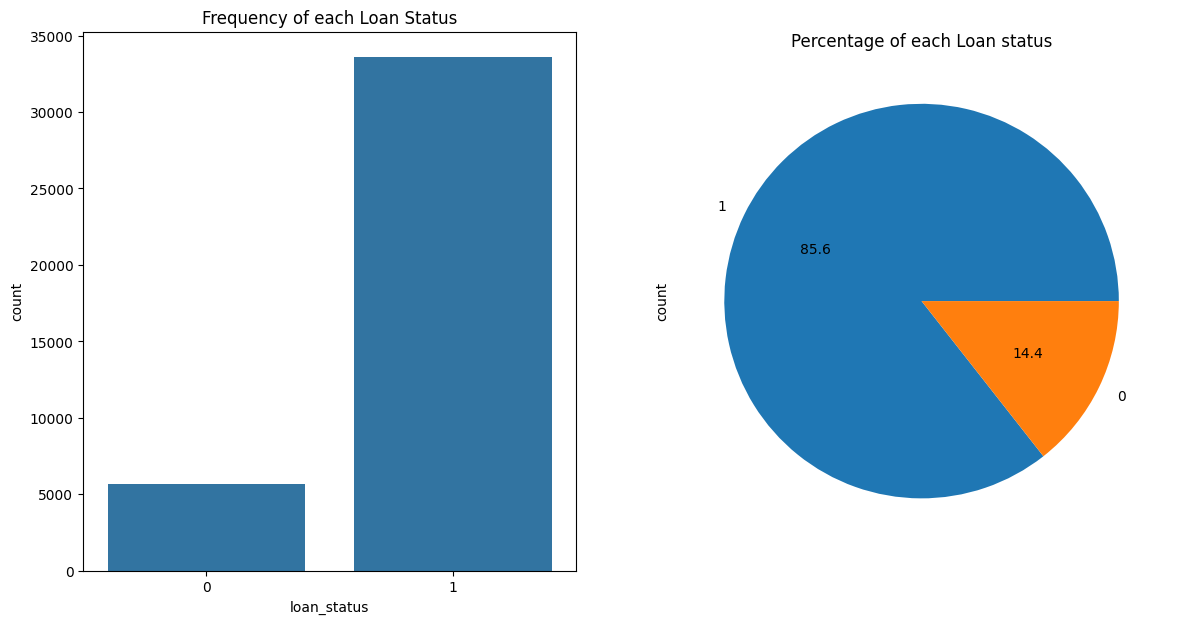

In [238]:
fig, axs = plt.subplots(1,2,figsize=(14,7)) 
sns.countplot(x='loan_status',data=filtered_loans,ax=axs[0]) 
axs[0].set_title("Frequency of each Loan Status") 
filtered_loans.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct= '%0.1f').set_title("Percentage of each Loan status") 
plt.show()

In [239]:
loans_2007 = filtered_loans

I can see that 85.6% of the borrowers in this data set paid of their loan while 14.4% defaulted.

As my goal is to build a model which can identify these defaulters, I am more interested in these 14.4% defaulters.

To increase profits the model must identify these defaulters, so I'll continue cleaning the data with an eye towards building a model that can identify likely defaulters at the point of application.


**Moving forward**

I'll Remove Columns with only One Unique Value. These columns won't be useful for the model since they don't add any information to each loan application. 

In addition, removing these columns will reduce the number of columns I'll need to explore further in the next stage. 

The pandas Series method nunique() returns the number of unique values, excluding any null values. I will apply this method across the data set to remove these columns in one easy step. 

In [240]:
loans_2007 = loans_2007.loc[:,loans_2007.apply(pd.Series.nunique) != 1]

Again, there may be some columns with more than one unique value, but one value that has insignificant frequency in the data set. 
Dropping any columns with unique values that appear fewer than four times:

In [241]:
for col in loans_2007.columns: 
    if (len(loans_2007[col].unique()) < 4): 
        print(loans_2007[col].value_counts()) 

term
36 months    29096
60 months    10143
Name: count, dtype: int64
verification_status
Not Verified       16845
Verified           12526
Source Verified     9868
Name: count, dtype: int64
loan_status
1    33586
0     5653
Name: count, dtype: int64
pymnt_plan
n    39238
y        1
Name: count, dtype: int64


The payment plan column (pymnt_plan) has two unique values, 'y' and 'n', with 'y' occurring only once. So droping this column:

In [242]:
loans_2007.columns

Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'fico_score'],
      dtype='object')

I will drop 'addr_state' column as it contains address state information and there are alot of states and thus won't provide any pattern

In [243]:
loans_2007.drop('addr_state', axis = 1, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8676\4136515727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_2007.drop('addr_state', axis = 1, inplace=True)


In [244]:
loans_2007 = loans_2007.drop('pymnt_plan', axis=1) 
print("We've been able to reduce the features to => {}".format(loans_2007.shape[1]))

We've been able to reduce the features to => 23


Lastly, let's use pandas to save our freshly-cleaned DataFrame as a CSV file: 

In [245]:
loans_2007.to_csv("filtered_loans_2007.csv",index=False)

Now that i have filtered out all the useless columns/features finally i can start preparing the data for machine learning.

- **Step 3: Preparing the data for machine learning**

- Handling missing values
- Categorical columns to numeric column
    - Map Ordinal Values to Integers
    - Encode Nominal Values As Dummy Variables
- Removing any other columns we might not need after the above steps

Categorical columns are converted to numeric columns as the machine learning models are based on mathematics and it won't be able to process categorical data.

In [246]:
# Loading the data from the file 'filtered_loans_2007.csv' which we saved 

filtered_loans = pd.read_csv('filtered_loans_2007.csv') 
print(filtered_loans.shape) 
filtered_loans.head() 

(39239, 23)


,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_score
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,...,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,Sep-2016,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,...,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,Sep-2016,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,...,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,Sep-2016,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,...,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,...,Nov-2004,3.0,9.0,0.0,7963.0,28.3%,12.0,Jan-2016,0.0,732.0


In [247]:
loans_2007.columns

Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_credit_pull_d', 'pub_rec_bankruptcies',
       'fico_score'],
      dtype='object')

- **Handling Missing Values**

I'll print the number of missing values and see how I can handle them

In [248]:
All_nulls = filtered_loans.isnull().sum()

print(f"Null values per column:\n{All_nulls}")

Null values per column:
loan_amnt                  0
term                       0
installment                0
grade                      0
emp_length              1057
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
fico_score                 0
dtype: int64


I'll remove the rows containing null values. 

This means I'll lose a bit of data, but in return keep some extra features to use for prediction (since I won't have to drop those columns). 

"pub_rec_bankruptcies" has 697 null values. As "pub_rec" shows any rec of public derogatory(A derogatory public record is a record of an action or incident that is recorded with a government agency and contains negative information), so i can drop "pub_rec_bankruptcies" column also.

In [249]:
filtered_loans = filtered_loans.drop("pub_rec_bankruptcies",axis=1) 
filtered_loans = filtered_loans.dropna() 

Now I can work with categorical columns

My goal here is to end up with a data set that's ready for machine learning, meaning that it contains no missing values and that all values in columns are numeric (float or int data type)

In [250]:
print("Data types and their frequency\n{}".format(filtered_loans.dtypes.value_counts()))

Data types and their frequency
float64    11
object     10
int64       1
Name: count, dtype: int64


There are 10 object type columns that contain text data(string data type) that needs to be converted to numerical data if possible or drop them.

I will print a sample of this data.

In [251]:
object_columns_df = filtered_loans.select_dtypes(include=['object']) 
print(object_columns_df.iloc[0]) 

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Sep-2016
Name: 0, dtype: object


Notice that "revol_util" column contains numeric values, but is formatted as object. 

The description of columns in the preview DataFrame earlier mentioned that "revol_util" is a "revolving line utilization rate or the amount of credit the borrower is using relative to all available credit". 

I will format "revol_util" as a numeric value.

Here's what I will do: 

Use the str.rstrip() string method to strip the right trailing percent sign (%) On the resulting Series object, then use the astype() method to convert to the type float. Then Assign the new Series of float values back to the revol_util column in the filtered_loans.

In [252]:
filtered_loans['revol_util'] = filtered_loans['revol_util'].str.rstrip('%').astype('float')
filtered_loans['revol_util'].head(10)

0    83.7
1     9.4
2    98.5
3    21.0
4    28.3
5    85.6
6    87.5
7    32.6
8    36.5
9    20.6
Name: revol_util, dtype: float64

Now I will find columns which has categorical values with less categories, because if there are more categories the algorithms won't be able to find a pattern which works to filter out defaulters.

In [253]:
col_list = object_columns_df.columns.tolist()
col_list

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'title',
 'earliest_cr_line',
 'revol_util',
 'last_credit_pull_d']

Now I will go ahead and printout each unique value respective to the columns.

Moving on, these columns seem to represent categorical values: 

home_ownership — home ownership status, can only be 1 of 4 categorical values according to the data dictionary. 

verification_status — indicates if income was verified by LendingClub. 

emp_length — number of years the borrower was employed upon time of application. 

term — number of payments on the loan, either 36 or 60. addr_state — borrower's state of residence. 

grade — LC assigned loan grade based on credit score. 

purpose — a category provided by the borrower for the loan request. 

title — loan title provided the borrower.

Based on the first row's values for purpose and title, it appears these two columns reflect the same information. 

Lastly the two date columns:

earliest_cr_line — The month the borrower's earliest reported credit line was opened. 

last_credit_pull_d — The most recent month LendingClub pulled credit for this loan. 

In [254]:
for x in col_list:
    val_cnt = filtered_loans[x].value_counts()
    print(f'\n {val_cnt}')
    


 term
36 months    28234
60 months     9889
Name: count, dtype: int64

 grade
B    11545
A     9675
C     7801
D     5086
E     2715
F      993
G      308
Name: count, dtype: int64

 emp_length
10+ years    8715
< 1 year     4542
2 years      4344
3 years      4050
4 years      3385
5 years      3243
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1244
Name: count, dtype: int64

 home_ownership
RENT        18271
MORTGAGE    16945
OWN          2808
OTHER          96
NONE            3
Name: count, dtype: int64

 verification_status
Not Verified       16391
Verified           12070
Source Verified     9662
Name: count, dtype: int64

 purpose
debt_consolidation    17965
credit_card            4944
other                  3764
home_improvement       2852
major_purchase         2105
small_business         1749
car                    1483
wedding                 927
medical                 663
moving                  556
house                   359
vacatio

First, I'll explore the unique value counts of the six columns that seem like they contain categorical values:

In [255]:
cols = ['home_ownership', 'grade','verification_status', 'emp_length', 'term'] 
for name in cols: 
    print(name,':') 
    print(object_columns_df[name].value_counts(),'\n') 

home_ownership :
home_ownership
RENT        18271
MORTGAGE    16945
OWN          2808
OTHER          96
NONE            3
Name: count, dtype: int64 

grade :
grade
B    11545
A     9675
C     7801
D     5086
E     2715
F      993
G      308
Name: count, dtype: int64 

verification_status :
verification_status
Not Verified       16391
Verified           12070
Source Verified     9662
Name: count, dtype: int64 

emp_length :
emp_length
10+ years    8715
< 1 year     4542
2 years      4344
3 years      4050
4 years      3385
5 years      3243
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1244
Name: count, dtype: int64 

term :
term
36 months    28234
60 months     9889
Name: count, dtype: int64 



Most of these columns contain discrete categorical values which I can encode as dummy variables(Dummy variables in machine learning are binary (0 or 1) variables created to represent categorical data, allowing algorithms to process non-numeric features) and keep. 

Next, I'll print out unique value counts for the purpose and title columns to understand which columns to keep.

In [256]:
for name in ['purpose','title']: 
    print("Unique Values in column: {}\n".format(name)) 
    print(filtered_loans[name].value_counts(),'\n')

Unique Values in column: purpose

purpose
debt_consolidation    17965
credit_card            4944
other                  3764
home_improvement       2852
major_purchase         2105
small_business         1749
car                    1483
wedding                 927
medical                 663
moving                  556
house                   359
vacation                349
educational             312
renewable_energy         95
Name: count, dtype: int64 

Unique Values in column: title

title
Debt Consolidation            2102
Debt Consolidation Loan       1635
Personal Loan                  632
Consolidation                  495
debt consolidation             476
                              ... 
Feb Loan                         1
Tictok24                         1
Wedding/Honeymoon Expenses       1
Veterinary Expense               1
JAL Loan                         1
Name: count, Length: 19021, dtype: int64 



It appears the purpose and title columns do contain overlapping information, but the purpose column contains fewer discrete values and is cleaner, so I'll keep it and drop title. 

In [257]:
filtered_loans.drop('title',axis=1, inplace=True)

I can extract the time duration of credit history from 'earliest_cr_history', 'last_credit_pull_d' date columns and checkout experience and stability of the borrower.

In [258]:
# Converting both columns to DateTime Data type

filtered_loans['earliest_cr_line'] = pd.to_datetime(filtered_loans['earliest_cr_line'], format='%b-%Y')
filtered_loans['last_credit_pull_d'] = pd.to_datetime(filtered_loans['last_credit_pull_d'], format='%b-%Y')

In [259]:
# Finding out how old is borrower's credit history in days

filtered_loans['cr_history'] = (filtered_loans['last_credit_pull_d'] - filtered_loans['earliest_cr_line']).dt.days
filtered_loans['cr_history'] = filtered_loans['cr_history'].astype('float')
min = filtered_loans['cr_history'].min()
max = filtered_loans['cr_history'].max()

print(f'Minimum length In days: {min}\nMaximum length In days: {max}')

Minimum length In days: 1157.0
Maximum length In days: 25080.0


I can Convert days to years for ease of use

In [260]:
# I will keep two decimals to represent month and days

filtered_loans['cr_history'] = round(filtered_loans['cr_history'] / 365.5, 2)
filtered_loans['cr_history'].head()

0    31.64
1    17.41
2    14.82
3    20.15
4    11.16
Name: cr_history, dtype: float64

Now that I have extracted info from the date columns I can drop the date columns

In [261]:
drop_cols = ['last_credit_pull_d', 'earliest_cr_line'] 

filtered_loans = filtered_loans.drop(drop_cols,axis=1)

- **Converting Categorical Columns to Numeric Features** 

There are two types of categorical features here in this dataset
- **Ordinal Values**: has some kind of order
For instance, LendingClub grades loan applicants from A to G, and assigns each applicant a corresponding interest rate - grade A is least risky, grade B is riskier than A, and so on: A < B < C < D < E < F < G ; where < means less risky than 

- **Nominal Values**: has no order
For instance, while I can order loan applicants in the employment length column (emp_length) based on years spent in the workforce: year 1 < year 2 < year 3 ... < year N, I can't do that with the column purpose. 

It wouldn't make sense to say: car < wedding < education < moving < house.

These are the columns I now have in our dataset: 
- **Ordinal Values**: "grade", "emp_length"
- **Nominal Values**: "home_ownership", "verification_status", "purpose", "term" 

There are different approaches to handle each of these two types. 
To map the ordinal values to integers, I can use the pandas DataFrame method replace() to map both "grade" and "emp_length" to appropriate numeric values:




In [262]:
mapping_dict = {"emp_length": { "10+ years": 10, 
                                "9 years": 9, 
                                "8 years": 8, 
                                "7 years": 7, 
                                "6 years": 6, 
                                "5 years": 5, 
                                "4 years": 4, 
                                "3 years": 3, 
                                "2 years": 2, 
                                "1 year": 1, 
                                "< 1 year": 0, 
                                "n/a": 0 }, 
                "grade":{ "A": 1, 
                         "B": 2, 
                         "C": 3, 
                         "D": 4, 
                         "E": 5, 
                         "F": 6, 
                         "G": 7 } } 

filtered_loans = filtered_loans.replace(mapping_dict) 
filtered_loans[['emp_length','grade']].head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8676\709455444.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_loans = filtered_loans.replace(mapping_dict)


,emp_length,grade
0,10,2
1,0,3
2,10,3
3,10,3
4,3,1


Now Converting nominal features into numerical features requires encoding them as dummy variables. 

The process will be: 
- Use pandas' get_dummies() method to return a new DataFrame containing a new column for each dummy variable. 
- Use the concat() method to add these dummy columns back to the original DataFrame. 
- Drop the original columns entirely using the drop method. 

In [263]:
# Step 1
nominal_columns = ["home_ownership", "verification_status", "purpose", "term"] 
dummy_df = pd.get_dummies(filtered_loans[nominal_columns])
dummy_df = dummy_df.astype(int) 

# Step 2
filtered_loans = pd.concat([filtered_loans, dummy_df], axis=1) 

# Step 3
filtered_loans = filtered_loans.drop(nominal_columns, axis=1) 

filtered_loans.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,162.87,2,10,24000.0,1,27.65,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,59.83,3,0,30000.0,0,1.00,0.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,84.33,3,10,12252.0,1,8.72,0.0,2.0,2.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,339.31,3,10,49200.0,1,20.00,0.0,1.0,10.0,...,0,0,0,1,0,0,0,0,1,0
4,5000.0,156.46,1,3,36000.0,1,11.20,0.0,3.0,9.0,...,0,0,0,0,0,0,0,1,1,0


Now i will explore the remaining columns

In [264]:
# Creating a list of columns 

col_list = filtered_loans.columns.tolist()
print(col_list)

['loan_amnt', 'installment', 'grade', 'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'fico_score', 'cr_history', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'term_ 36 months', 'term_ 60 months']


In [265]:
# Creating a default function which will return unique values and
# their number of instances for each column.

def col_value_counts():    
    for col_name in col_list:
        print(filtered_loans[col_name].value_counts())    

In [266]:
col_value_counts()

loan_amnt
10000.0    2760
12000.0    2262
5000.0     1964
6000.0     1846
15000.0    1835
           ... 
18575.0       1
26250.0       1
11775.0       1
16350.0       1
22550.0       1
Name: count, Length: 871, dtype: int64
installment
311.11    68
311.02    54
180.96    53
150.80    46
368.45    45
          ..
403.75     1
300.61     1
534.89     1
271.70     1
255.43     1
Name: count, Length: 14990, dtype: int64
grade
2    11545
1     9675
3     7801
4     5086
5     2715
6      993
7      308
Name: count, dtype: int64
emp_length
10    8715
0     4542
2     4344
3     4050
4     3385
5     3243
1     3207
6     2198
7     1738
8     1457
9     1244
Name: count, dtype: int64
annual_inc
60000.00     1456
50000.00     1014
40000.00      850
45000.00      803
75000.00      793
             ... 
64512.00        1
50343.00        1
29056.87        1
118374.00       1
27376.00        1
Name: count, Length: 5060, dtype: int64
loan_status
1    32717
0     5406
Name: count, dtype: int64
dti

revol_util
0.00     936
0.20      62
63.00     61
40.70     58
61.00     56
        ... 
25.74      1
0.12       1
0.83       1
47.36      1
7.28       1
Name: count, Length: 1087, dtype: int64
total_acc
16.0    1414
15.0    1402
17.0    1392
14.0    1391
20.0    1383
        ... 
78.0       1
72.0       1
87.0       1
77.0       1
76.0       1
Name: count, Length: 82, dtype: int64
fico_score
702.0    2049
687.0    2030
697.0    1982
692.0    1967
682.0    1959
722.0    1778
707.0    1769
677.0    1757
727.0    1723
717.0    1710
672.0    1613
712.0    1610
667.0    1572
732.0    1536
737.0    1511
742.0    1418
662.0    1377
747.0    1257
752.0    1233
757.0    1037
762.0     943
772.0     753
767.0     733
777.0     622
782.0     536
792.0     398
787.0     373
797.0     319
802.0     226
807.0     172
812.0     115
817.0      24
822.0      17
827.0       2
632.0       1
627.0       1
Name: count, dtype: int64
cr_history
17.82    260
15.82    252
16.07    245
14.99    242
15.99    23

In [267]:
# Converting some columns to integer type column as 
# integer type data consumes less memory than float type data

float_to_int = ['loan_amnt', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc']
for x in float_to_int:
    filtered_loans[x] = filtered_loans[x].astype('int64')
    print(f"{x} column is converted to integer type column.\n")

loan_amnt column is converted to integer type column.

delinq_2yrs column is converted to integer type column.

inq_last_6mths column is converted to integer type column.

open_acc column is converted to integer type column.

pub_rec column is converted to integer type column.

total_acc column is converted to integer type column.



**Now exploring columns to transform them and make them ready as a training data**
- Starting with 'loan_amnt' column.

In [268]:
filtered_loans['loan_amnt'].dtype

dtype('int64')

<Axes: xlabel='index', ylabel='loan_amnt'>

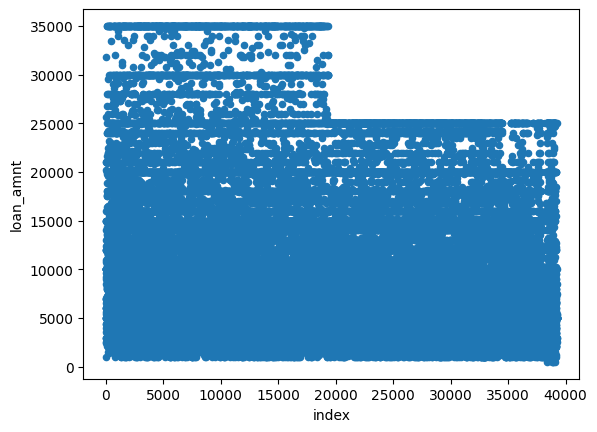

In [269]:
temp_df = filtered_loans.reset_index()
temp_df.plot(kind='scatter', x='index', y='loan_amnt')

There are no visible groups. 'installment' column is based on this so no need to explore that.

- **Next is 'annual_inc' column**

<Axes: xlabel='index', ylabel='annual_inc'>

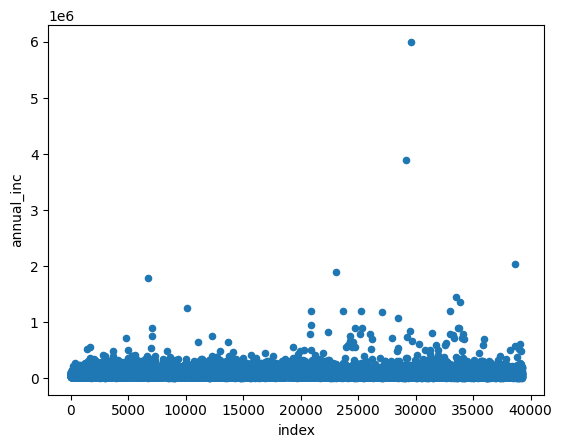

In [270]:
# PLotting 'annual_inc' column
temp_df.plot(kind='scatter', x='index', y='annual_inc')

There are no visible groups.

To make sure all the features are of the same length, contain no null value, and are numerical. I'll use pandas's **info** method to inspect the filtered_loans DataFrame:

In [271]:
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38123 entries, 0 to 39238
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38123 non-null  int64  
 1   installment                          38123 non-null  float64
 2   grade                                38123 non-null  int64  
 3   emp_length                           38123 non-null  int64  
 4   annual_inc                           38123 non-null  float64
 5   loan_status                          38123 non-null  int64  
 6   dti                                  38123 non-null  float64
 7   delinq_2yrs                          38123 non-null  int64  
 8   inq_last_6mths                       38123 non-null  int64  
 9   open_acc                             38123 non-null  int64  
 10  pub_rec                              38123 non-null  int64  
 11  revol_bal                        

Now the data is cleaned and preprocessed it can be used as training data so i will store it in a csv file named **'cleaned_loans_2007.csv'**.

In [272]:
filtered_loans.to_csv("cleaned_loans_2007.csv",index=False)